<br>

<br>

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Stroke Prediction

<br>

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1055,58138,Male,57.0,0,0,Yes,Private,Rural,111.64,31.5,never smoked,0
854,25488,Female,46.0,0,0,Yes,Self-employed,Urban,94.63,24.9,never smoked,0
4974,16513,Male,78.0,0,0,Yes,Private,Urban,104.37,29.7,never smoked,0
1274,60399,Male,53.0,0,0,Yes,Self-employed,Rural,76.79,33.9,Unknown,0
656,54866,Female,9.0,0,0,No,children,Rural,57.27,28.0,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
for i in df.select_dtypes('object').columns:
    #if len(df[i].unique())<100:
        print(i , "\n\n", df[i].value_counts(dropna = False),"\n","\n","**********************************""\n\n")
        
    #else :
        #print("\n","***",i,"***","\n")

gender 

 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 
 
 **********************************


ever_married 

 Yes    3353
No     1757
Name: ever_married, dtype: int64 
 
 **********************************


work_type 

 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 
 
 **********************************


Residence_type 

 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 
 
 **********************************


smoking_status 

 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 
 
 **********************************




In [41]:
for i in df.select_dtypes(['int64','float64']).columns:
    if len(df[i].unique())<100:
        print(i,"\n\n", df[i].value_counts(dropna = False),"\n\n","**********************************","\n\n")
        
    else :
        print("\n","***",i,"***","\n")


 *** age *** 

hypertension 

 0    4611
1     498
Name: hypertension, dtype: int64 

 ********************************** 


heart_disease 

 0    4833
1     276
Name: heart_disease, dtype: int64 

 ********************************** 



 *** avg_glucose_level *** 


 *** bmi *** 

stroke 

 0    4860
1     249
Name: stroke, dtype: int64 

 ********************************** 




In [7]:
df = df[df.gender != 'Other']

In [8]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

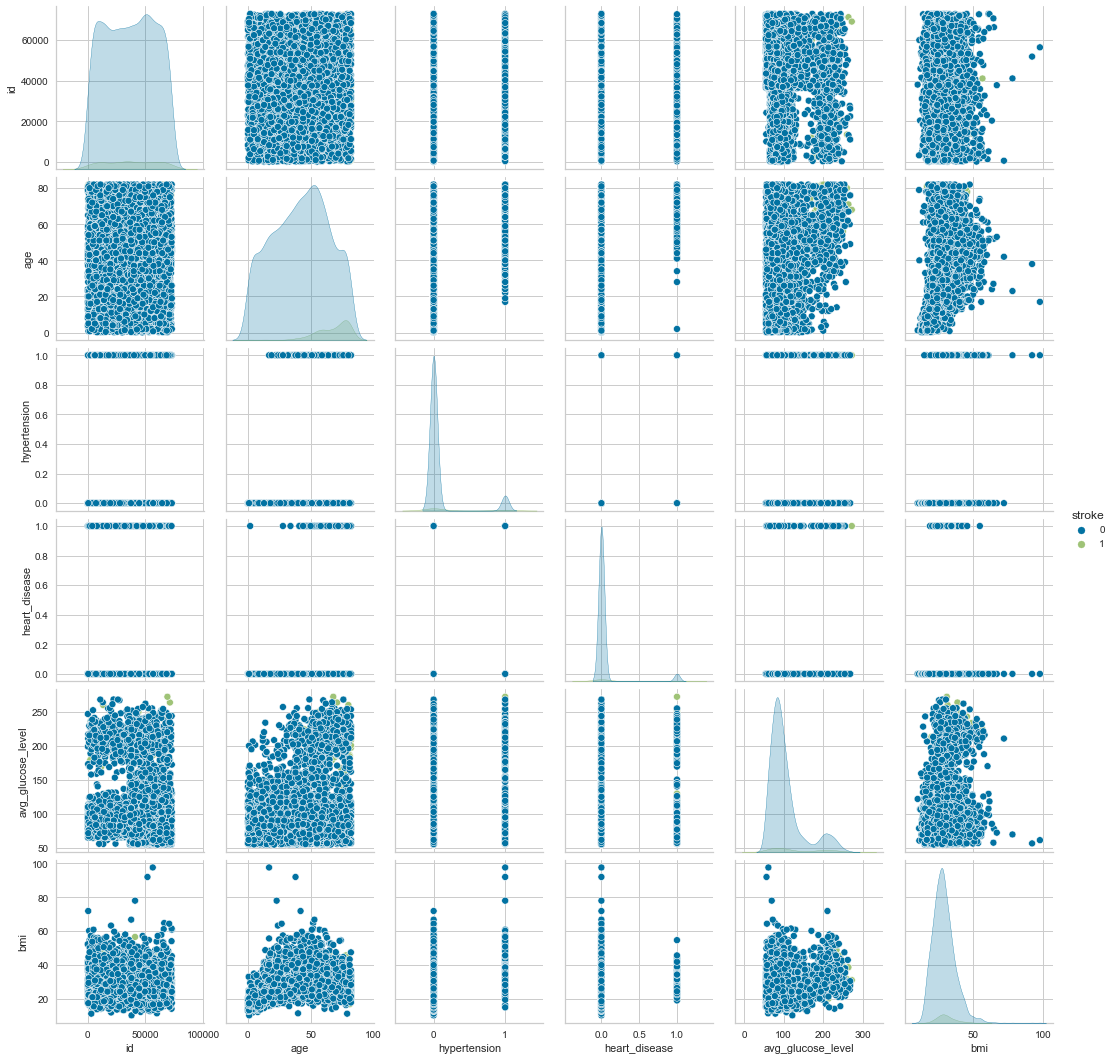

In [9]:
sns.pairplot(df, hue = 'stroke')

<AxesSubplot:>

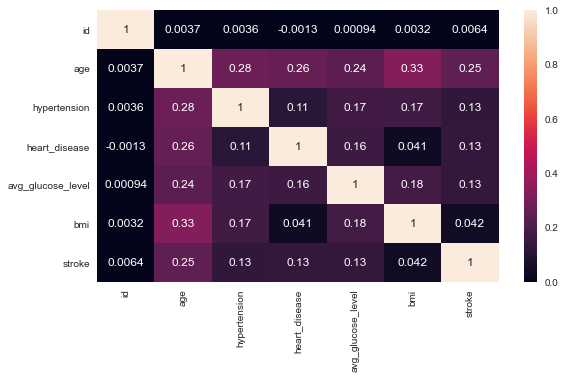

In [10]:
sns.heatmap(df.corr(),annot = True)

In [11]:
df = df.drop('id', axis = 1)

In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'], dtype='object')

In [13]:
df.sample(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3550,Female,35.0,0,0,Yes,Private,Urban,87.72,21.3,never smoked,0
3328,Male,72.0,0,1,Yes,Self-employed,Urban,63.86,29.5,smokes,0
4840,Female,31.0,0,0,No,Private,Rural,90.29,38.7,Unknown,0


In [14]:
#df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
#df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

In [20]:
df.sample(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3674,Male,69.0,0,0,Yes,Self-employed,Urban,202.51,30.8,formerly smoked,0
135,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
2379,Female,16.0,0,0,No,Private,Rural,79.03,29.3,Unknown,0


<br>

## Missing Values

In [89]:
df1 = df.copy()

In [90]:
df1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [91]:
df1.bmi.value_counts(dropna=False)

NaN     201
28.7     41
28.4     38
27.7     37
26.7     37
27.6     37
26.1     37
27.3     36
23.4     36
27.0     35
25.1     34
26.4     34
26.9     34
25.5     33
28.9     31
23.5     31
24.8     31
28.3     30
31.4     30
30.3     30
22.2     30
29.4     30
26.5     30
24.2     29
29.1     29
27.5     29
26.6     29
28.1     29
25.3     28
32.3     28
24.0     28
27.9     28
28.0     28
27.1     28
24.1     28
30.9     27
31.5     27
29.7     27
24.9     27
23.0     27
30.0     27
25.0     27
28.5     27
21.5     27
28.6     27
26.2     27
28.8     26
29.6     26
25.4     26
29.9     26
24.5     26
31.1     26
24.3     26
29.0     26
30.1     26
29.5     26
29.2     26
26.0     25
20.1     25
22.7     25
33.1     25
32.8     25
22.8     25
28.2     25
25.9     24
27.2     24
25.8     24
23.9     24
35.8     24
31.8     24
23.6     24
30.5     24
32.1     24
26.3     23
30.7     23
24.4     23
20.4     23
33.5     23
29.8     23
27.8     23
22.1     22
24.6     22
29.3     22
24.7

In [92]:
df1.bmi.mean()

28.894559902200502

In [93]:
df1.bmi.fillna(df1['bmi'].mean(), inplace=True)

In [94]:
df1.bmi.isnull().sum()

0

## Getting Dummies

In [95]:
df1 = pd.get_dummies(df1, drop_first= True)
df1.sample(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2737,55.0,0,0,163.82,27.5,0,1,1,0,0,1,0,0,0,1,0
5102,57.0,0,0,77.93,21.7,0,0,1,0,1,0,0,0,0,1,0
2015,11.0,0,0,99.79,20.2,0,1,0,0,0,0,1,1,0,0,0


<br>

## Train - Test Split

In [96]:
X = df1.drop('stroke', axis =1)
y = df1['stroke']

In [97]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.89456,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.00000,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.00000,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.60000,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,1,1,0,1,0,0,0,1,0,0


In [98]:
y 

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 55)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4087, 15), (1022, 15), (4087,), (1022,))

<br>

## Scaling

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
log_model = LogisticRegression(class_weight= 'balanced')

In [104]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [105]:
y_pred = log_model.predict(X_test_scaled)

In [106]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [108]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[725 249]
 [ 14  34]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       974
           1       0.12      0.71      0.21        48

    accuracy                           0.74      1022
   macro avg       0.55      0.73      0.53      1022
weighted avg       0.94      0.74      0.82      1022

